<h2>Using SAS DLPy to Create Training Data Sets for Object Detection Models</h2>


This example uses SAS DLPy to create and manipulate training image data sets for use with CNN-based object detection models. The learning objective is to understand how you can create your own object detection training data set using SAS DLPy and only a few lines of code. You should also learn how to visually inspect an object detection data set for potential issues.

### Table of Contents 
- [Important Note: Client and Server Definitions](#ClientServer)
- [Prepare Resources and Configure Environment for Modeling](#getReady)
    - [Download the Raw and Annotated Image Data](#downloadData)
    - [Load Required SAS CAS and DLPy Utilities](#utils)
- [Connect to a SAS CAS Session](#connectCAS)
- [Create and Load CAS Image Table for Object Detection Model](#createObject)
- [Visualize Object Detections in Image Table Data](#visualizeObject)

<a id = "ClientServer"></a>

### Important Note: Client and Server Definitions
SAS Viya literature and technical documentation often refers to client and server entities. In this scenario, the client is the computer that runs the Jupyter notebook with the example code. The server is the computer that is running the Viya server. These two computers might (or might not) use the same operating system, and might (or might not) have access to a common file system.

This notebook assumes that the client and server do not use the same operating system, but that they do have access to a common file system. If the client and server in your environment use different operating systems and they do not have access to a common file system, this example will not work.

In [1]:
# This code defines path variables that contain path specifications to  
# the server-side raw image files and the client-side annotation files.

# Path variable for server-side raw image files
image_data_path = r'/your-server/path-to/object_detection/image_data' 

# Path variable for client-side image annotation files
annotation_local_path = r'\\your-client\path-to\object_detection\annotation_data'

<a id="getReady"></a>

### Prepare Resources and Configure Environment for Modeling

This section organizes all of the resources that you will need and configures your computing environment for the notebook example. Performing these tasks in advance means you can run the example without stopping to locate and download necessary resources. This approach enables you to focus on how to use SAS DLPy to complete the analytic modeling task in this notebook.

<a id="downloadData"></a>

#### Download the Raw and Annotated Image Data

This example notebook uses SAS-generated data sets of raw and annotated images to generate an object detection table with annotations that can be used to train an object detection model. 

From the [SAS Viya Deep Learning Models and Tools](https://support.sas.com/documentation/prod-p/vdmml/zip/index.html) support page, use the [Create_Obj_Det_Train_Data.zip](https://support.sas.com/documentation/prod-p/vdmml/zip/Create_Obj_Detection_Training_Data.zip) link to download the master archive file that contains both raw and annotated image archive files. 

From the master archive, extract the `Obj_Det_Table_Images.zip` raw image files to the server-side location you defined earlier as `image_data_path`. Next, extract the `Obj_Det_Table_Annotations.zip` annotation files to the client-side location defined earlier as `annotation_local_path`. 

<a id="utils"></a>

#### Load Required SAS CAS and DLPy Utilities

SAS DLPy requires a running SAS CAS server and Scripting Wrapper for Analytic Transfer (SWAT). The SWAT package is a Python interface to CAS. 

<b>Note:</b> For more information about starting a CAS session with the SWAT package, see https://sassoftware.github.io/python-swat/getting-started.html.

Next, import the functions for the DLPy and DLPy `utils`.

In [6]:
from swat import *
import dlpy
from dlpy.utils import *

<a id="connectCAS"></a>
    
### Connect to SAS CAS
After configuring your environment and loading the required libraries and functions, connect to your SAS CAS server and specify your CAS portID. SAS notebook examples use port 5570 by default, but you can substitute another port number of your own choosing.

In [2]:
# Connect to the SAS CAS Server

s = CAS('your-server.your-company.com', 5570)

<a id="createObject"></a>

### Create and Load CAS Image Table for Object Detection Model

Use the `create_object_detection_table()` function to create a CAS image table for a CNN-based object detection task. Data tables for object detection models are more difficult to create than data tables for image classification models because the ground truth information in the object detection task is more complicated. Image classification data tables require only one label column, but object detection models can require multiple bounding boxes and two or more label columns. 

When creating labeled image data to train an object detection model, there should be an annotation file for each image that has the same file name, but a different file extension. This file should contain the ground truth information for a specific image.</ul>  

The `create_object_detection_table()` function performs the following tasks:
1. Parses the contents of the ground truth information file.
2. Formats the ground truth information into a Python data frame.
3. Creates a metadata table to store the ground truth information. 
4. Loads and processes the model image data. Processing the data includes extracting 
   features and loading the metadata into a single table.  

You can use the combined object detection image table as data for DLPy model functions and CAS Deep Learning actions. 

As written, this analytic task performs both server- and client-side operations. In most cases, two paths must be specified for the `create_object_detection_table()` function: `data_path` (raw images) and `local_path` (image annotations). 

However, if the CAS server operating system and the operating system that hosts the SAS DLPy session are the same, then you can use just the `data_path` variable to point to a common location where both raw image and image annotation files are stored. If you have different operating systems for CAS and DLPy, but can specify a common folder location with server-side and client-side paths, you can also store both raw image and annotated image files in the same `data_path` location. 

Otherwise, use the `data_path` variable to point to the server-side path specification for the raw image files, and use the `local_path` variable to point to the client-side path specification for the annotation files. The code below uses separate server-side and client-side path variables to point to the corresponding files. 

The `coord_type` specification determines the data format used to define the bounding boxes. DLPy supports *yolo* and *coco* formats. This example specifies YOLO-style bounding box coordinates.

In [3]:
# Create Detected Target Table with Annotations
obj_det_targets = create_object_detection_table(s, 
                                                data_path = image_data_path, 
                                                local_path = annotation_local_path,
                                                coord_type = 'yolo', 
                                                output = 'detTbl')

NOTE: Loaded 90 images from /your-server/path-to/object_detection/image_data into Cloud Analytic Services table DET_IMG_b3JQpD.
NOTE: Images are processed.
NOTE: Object detection table is successfully created.


The log indicates that the SAS CAS output table `detTbl` was created, and that 90 images were loaded and processed.

<a id="visualizeObject"></a>

### Visualize Object Detections in Image Table Data

The SAS DLPy `display_object_detections()` function displays the bounding boxes around detected objects in table images. Use the `display_object_detections()` function when you want to browse object detections in an image table, or to evaluate object detection accuracy when a trained model scores new images.

The following code uses the `display_object_detections()` function to browse the images in the CAS output table `detTbl`. Examine the table images to see detected objects and bounding box labels. 

The function call in the following code returns an output table that displays 6 images from the newly created object detection table `detTbl`.

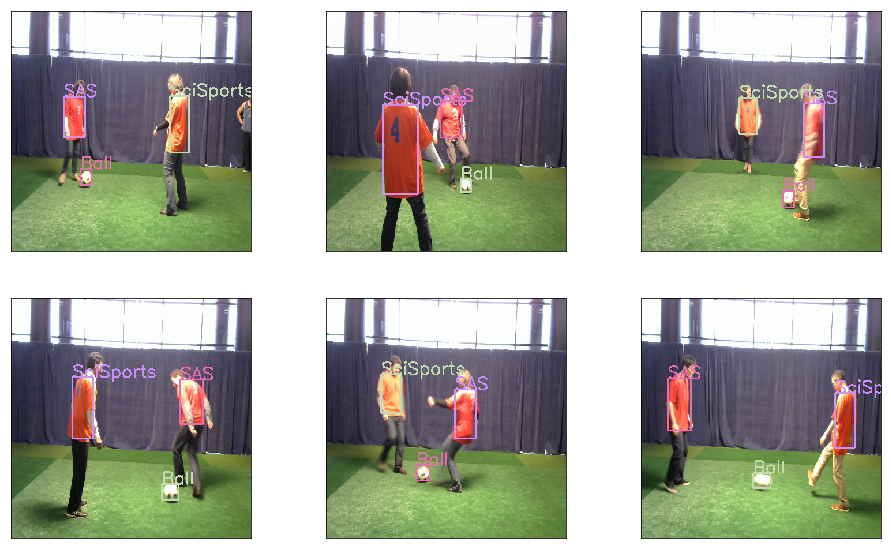

In [4]:
display_object_detections(s, 
                          'detTbl', 
                          'yolo', 
                          max_objects=3, 
                          num_plot=6, 
                          n_col=3)